In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [88]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [90]:
bot_val = int(df.quantile(0.025))
top_val = int(df.quantile(0.975))

In [92]:
df = df[bot_val < df['value']]

In [93]:
df = df[df['value'] < top_val]

In [94]:
df.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [95]:

df['date'] = pd.to_datetime(df['date'])

In [59]:
df['date'].dtype

dtype('<M8[ns]')

In [38]:
df['date'][2] < df['date'][3]


True

In [40]:
df['date'][2] - df['date'][1]

Timedelta('1 days 00:00:00')

In [99]:
df = df.reset_index()
df = df.drop(columns='index')
df

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [100]:
df.shape

(1238, 2)

Text(0, 0.5, 'Page Views')

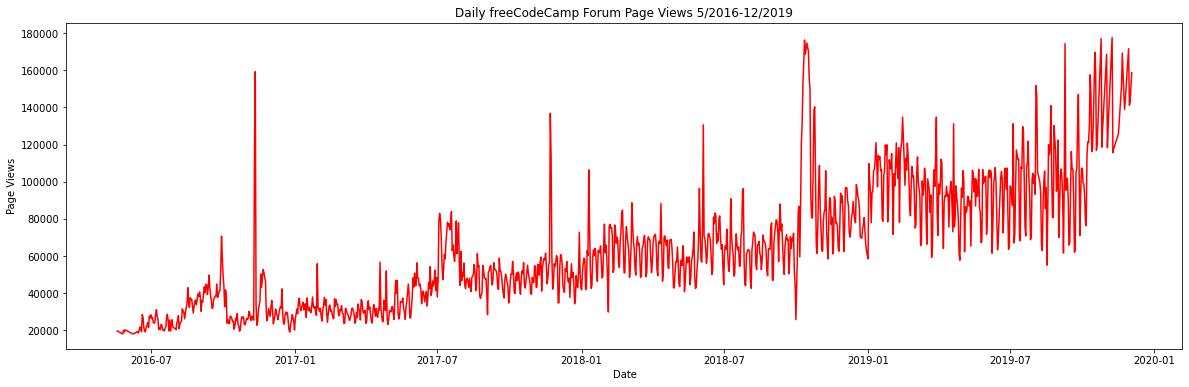

In [173]:
plt.figure(figsize=(20,6))
fig = plt.plot(df['date'],df['value'],color = 'red')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.ylabel('Page Views')



In [127]:
df['date'][1].year

2016

In [130]:
df['year'] = df['date'].dt.year


In [131]:
df['month'] = df['date'].dt.month

In [132]:
df.head()

,date,value,year,month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5


In [148]:
df['year'].dtype

dtype('int64')

In [171]:
ave_monthly_views = df.groupby(['year','month']).mean()

ave_monthly_views['value'] = ave_monthly_views['value'].astype(int)
ave_monthly_views.head()

value
year month       
2016 5      19432
     6      21875
     7      24109
     8      31049
     9      41476

In [225]:
year_16 = ave_monthly_views.iloc[0:8]
year_17 = ave_monthly_views.iloc[8:20]
year_18 = ave_monthly_views.iloc[20:32]
year_19 = ave_monthly_views.iloc[32:]

In [228]:
# year_16, year_17, year_18, 
year_19

value
year month        
2019 1      102056
     2      105968
     3       91214
     4       89368
     5       91439
     6       90435
     7       97236
     8      102717
     9       97268
     10     122802
     11     143166
     12     150733

In [233]:
ss = pd.melt(ave_monthly_views, id_vars=['month','year'], value_vars= ['value'])

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyError: "The following 'id_vars' are not present in the DataFrame: ['month', 'year']"

(8, 1)

In [230]:
year_16_views = list(year_16['value'])
year_17_views = list(year_17['value'])
year_18_views = list(year_18['value'])
year_19_views = list(year_19['value'])
month_16 = [5,6,7,8,9,10,11,12]

In [229]:
month_17 = list(np.arange(1,13))
month_18 = month_17 
month_19 = month_18


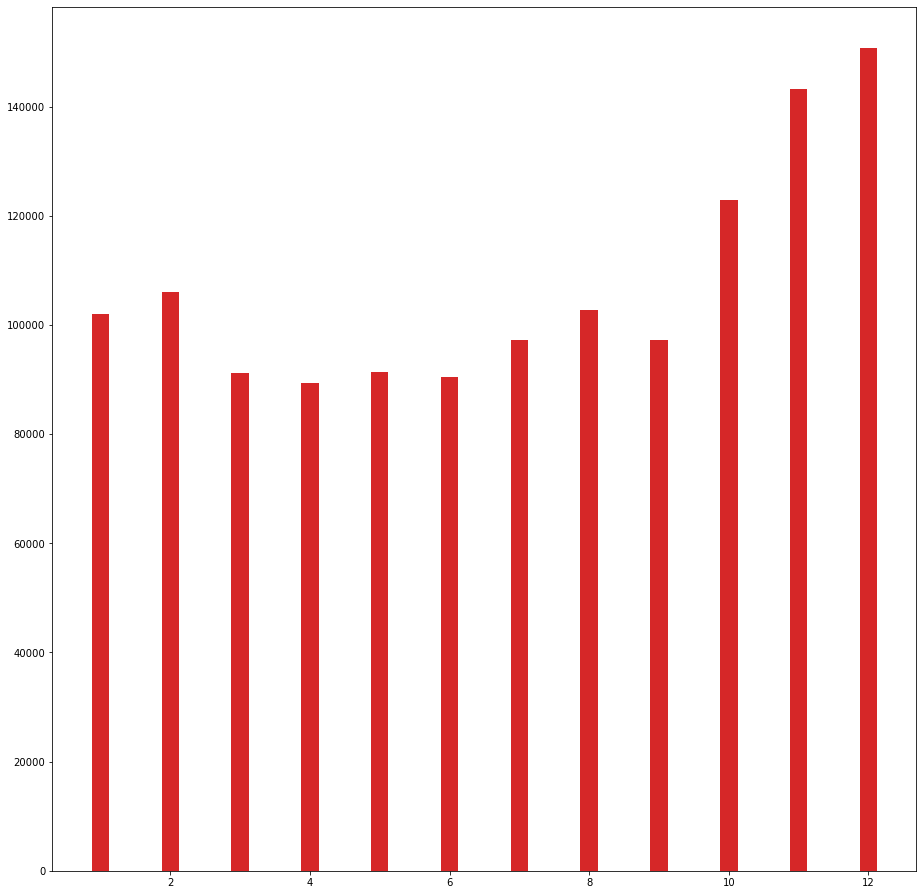

In [232]:
figg = plt.figure(figsize= (12,12));


ax = figg.add_axes([0,0,1,1])

ax.bar(month_16 ,year_16_views, width=0.25)
ax.bar(month_17 ,year_17_views, width=0.25)
ax.bar(month_18 ,year_18_views, width=0.25)
ax.bar(month_19 ,year_19_views, width=0.25)

plt.show;

<BarContainer object of 4 artists>

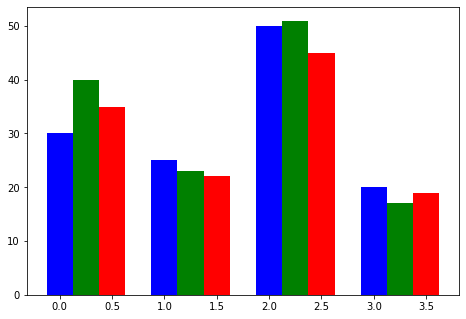

In [178]:
#data = [[30, 25, 50, 20],
#[40, 23, 51, 17],
#[35, 22, 45, 19]]
X = np.arange(4)
figgg = plt.figure()
ax = figgg.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [ ]:
year_2016 = 

In [170]:
fig_2 = plt.bar(df[])

KeyError: 'ave_monthly_views'

In [ ]:
#def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['month'] = df.index.month
    df_bar['year'] = df.index.year
    df_bar2 = pd.melt(df_bar,id_vars=['month','year'],value_vars=['value'],value_name='page views')
    df_bar2.drop('variable',axis='columns',inplace=True)
    df_bar3 = df_bar2.groupby(['year', 'month'],as_index=False)['page views'].mean()
    df_bar3['month']=pd.to_datetime(df_bar3['month'],format='%m') 
    df_bar3['month'] = df_bar3['month'].dt.strftime('%B')

    df4 = df_bar3.pivot(index='year', columns='month', values='page views')
    df4 = df4.reindex(['January','February','March', 'April','May','June','July','August','September','October','November','December'], axis=1)
    df4.fillna(0,inplace=True)

    fig,axs= plt.subplots(figsize=(15,9))
    df4.plot(ax=axs,kind='bar')
    axs.set_ylabel("Average Page Views")
    axs.set_xlabel('Years')
    plt.legend(title='Months')
    

    

    # Draw bar plot
    




    #Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
#    return fig
